In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import decomposition
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer


In [2]:
df = pd.read_parquet("../kaggle-pog-series-s01e01/dataset_sorted_category.parquet")
df.columns

Index(['index', 'video_id', 'title', 'publishedAt', 'channelId', 'category',
       'channelTitle', 'categoryId', 'trending_date', 'tags', 'view_count',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'description', 'id',
       'duration_seconds', 'has_thumbnail', 'target', 'publish_day',
       'publish_hour', 'trending_date-publishedAt', 'tags_len',
       'description_len', 'is_short', 'duratiom_index', 'description_title'],
      dtype='object')

In [3]:
df.dtypes

index                                      int64
video_id                                  object
title                                     object
publishedAt                  datetime64[ns, UTC]
channelId                                 object
category                                  object
channelTitle                              object
categoryId                                 int64
trending_date                     datetime64[ns]
tags                                      object
view_count                               float64
likes                                    float64
dislikes                                 float64
comment_count                            float64
thumbnail_link                            object
comments_disabled                           bool
ratings_disabled                            bool
description                               object
id                                        object
duration_seconds                         float64
has_thumbnail       

In [4]:
drop_col = ["video_id", "title", "publishedAt", "channelId", "category", "channelTitle", "trending_date",
           "tags", "thumbnail_link", "description", "id", "description_title", "has_thumbnail",
           "ratings_disabled"]

drop_col += ["likes", "dislikes", "comment_count", "target", "duration_seconds", "is_short"]

df["categoryId"] = pd.Categorical(df["categoryId"]).codes
df.loc[df["comments_disabled"] == True, "comments_disabled"] = 1
df.loc[df["comments_disabled"] == False, "comments_disabled"] = 0
df.loc[df["ratings_disabled"] == True, "ratings_disabled"] = 1
df.loc[df["ratings_disabled"] == False, "ratings_disabled"] = 0
df.loc[df["is_short"] == True, "is_short"] = 1
df.loc[df["is_short"] == False, "is_short"] = 0

df["comments_disabled"] = df["comments_disabled"].astype(np.int64)
df["ratings_disabled"] = df["ratings_disabled"].astype(np.int64)
df["is_short"] = df["is_short"].astype(np.int64)

df = df.drop(columns=drop_col)
df.dtypes

index                          int64
categoryId                      int8
view_count                   float64
comments_disabled              int64
publish_day                    int64
publish_hour                   int64
trending_date-publishedAt    float64
tags_len                     float64
description_len              float64
duratiom_index                 int64
dtype: object

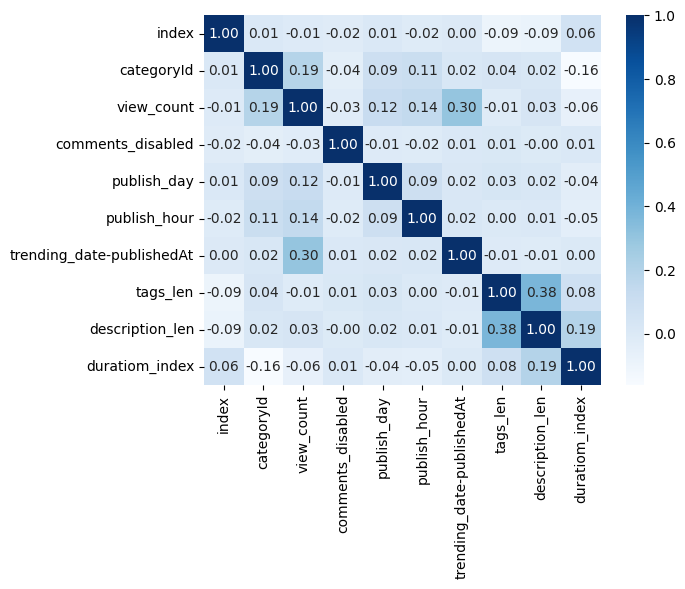

In [5]:
sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt='.2f')
plt.show()

In [6]:
df.corr()["view_count"].sort_values()

duratiom_index              -0.063944
comments_disabled           -0.026661
tags_len                    -0.014231
index                       -0.008190
description_len              0.033884
publish_day                  0.117016
publish_hour                 0.138296
categoryId                   0.190691
trending_date-publishedAt    0.301195
view_count                   1.000000
Name: view_count, dtype: float64

categoryId                  -0.096928  
duration_seconds            -0.071373  
publish_hour                -0.045643  
comments_disabled           -0.026661  
tags_len                    -0.014231  
index                       -0.008190  
description_len              0.033884  
publish_day                  0.064037  
is_short                     0.071888  
trending_date-publishedAt    0.301195  
view_count                   1.000000  
Name: view_count, dtype: float64

In [7]:
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.5364111021428261

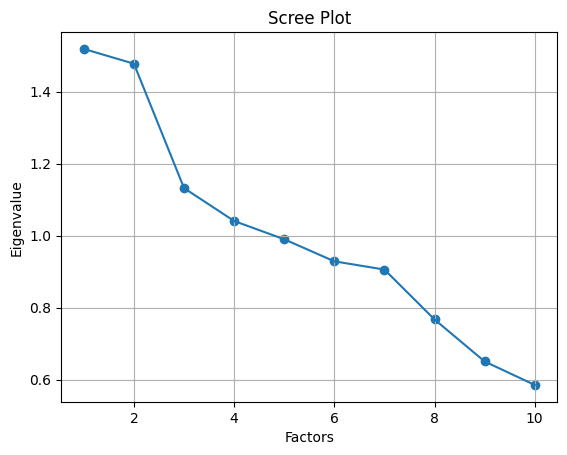

In [8]:
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df)

ev, v = fa.get_eigenvalues()

plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

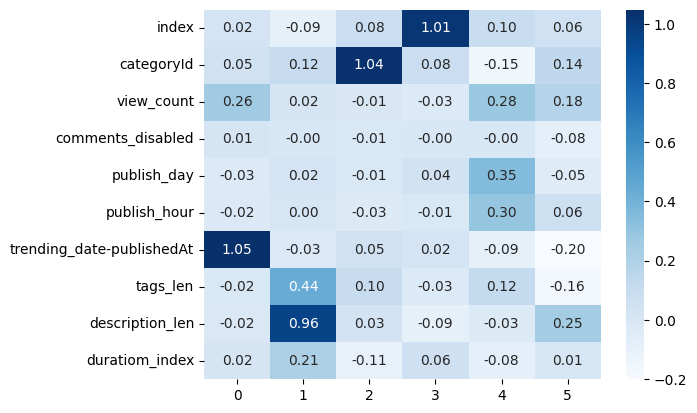

In [9]:
fa = FactorAnalyzer(n_factors=6, method="ml", rotation="promax")
fa.fit(df)

items = df.columns.tolist()

efa_result= pd.DataFrame(fa.loadings_, index=items)
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')
plt.show()